# Data Preprocessing & Exploratory Analysis Notebook
This notebook implements preprocessing and exploratory analysis for news dataset.
1. Initial Cleaning
2. Duplicate Detection & Removal
3. Exploratory Data Analysis (EDA)
4. Linguistic Preprocessing (Lemmatization)
5. Train/Validation/Test Split

In [1]:
import pandas as pd

import warnings

warnings.filterwarnings('ignore')

In [2]:
DATA_DIR = '../data'

df = pd.read_csv(DATA_DIR + '/lenta_news.csv', parse_dates=['date'],
                 dtype={'url': object, 'title': object, 'text': object, 'topic': object, 'tags': object})

In [3]:
df.shape

(808558, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808558 entries, 0 to 808557
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   url     808558 non-null  object        
 1   title   808557 non-null  object        
 2   text    808553 non-null  object        
 3   topic   808339 non-null  object        
 4   tags    780018 non-null  object        
 5   date    808558 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 37.0+ MB


In [5]:
df.head()

,url,title,text,topic,tags,date
0,https://lenta.ru/news/1914/09/16/hungarnn/,1914. Русские войска вступили в пределы Венгрии,Бои у Сопоцкина и Друскеник закончились отступ...,Библиотека,Первая мировая,1914-09-16
1,https://lenta.ru/news/1914/09/16/lermontov/,1914. Празднование столетия М.Ю. Лермонтова от...,"Министерство народного просвещения, в виду про...",Библиотека,Первая мировая,1914-09-16
2,https://lenta.ru/news/1914/09/17/nesteroff/,1914. Das ist Nesteroff!,"Штабс-капитан П. Н. Нестеров на днях, увидев в...",Библиотека,Первая мировая,1914-09-17
3,https://lenta.ru/news/1914/09/17/bulldogn/,1914. Бульдог-гонец под Льежем,Фотограф-корреспондент Daily Mirror рассказыва...,Библиотека,Первая мировая,1914-09-17
4,https://lenta.ru/news/1914/09/18/zver/,1914. Под Люблином пойман швабский зверь,"Лица, приехавшие в Варшаву из Люблина, передаю...",Библиотека,Первая мировая,1914-09-18


In [6]:
df.tail()

,url,title,text,topic,tags,date
808553,https://lenta.ru/news/2025/04/15/poyavilos-vid...,Появилось видео последствий атаки дрона ВСУ на...,В сети появилось видео последствий атаки дрона...,Россия,Происшествия,2025-04-15
808554,https://lenta.ru/news/2025/04/15/kallas-vyskaz...,Каллас высказалась о поставках ракет Taurus Ук...,Глава дипломатии Европейского союза (ЕС) Кая К...,Мир,Политика,2025-04-15
808555,https://lenta.ru/news/2025/04/15/v-rade/,В Раде рассказали о попавшем в тупик Зеленском,Президент Украины Владимир Зеленский оказался ...,Мир,Политика,2025-04-15
808556,https://lenta.ru/news/2025/04/15/raskryty-posl...,Раскрыты последствия атаки дрона ВСУ на жилой ...,В Курске дрон Вооруженных сил Украины (ВСУ) вр...,Россия,Происшествия,2025-04-15
808557,https://lenta.ru/news/2025/04/15/stalo-izvestn...,Стало известно об ударе ВСУ по нескольким мног...,В результате массовой атаки БПЛА в Курске пост...,Россия,Происшествия,2025-04-15


## 1. Initial Cleaning

In [7]:
df.drop(columns=['tags'], inplace=True)

In [8]:
df.dropna(subset=['url', 'title', 'text', 'topic', 'date'], inplace=True)
df['title'] = df['title'].str.replace(' ', ' ')
df['text'] = df['text'].str.replace(' ', ' ')

## 2. Duplicate Detection and Removal
Was created `title_clean` and `text_clean` by lowercasing and stripping non-Cyrillic characters.
1. Remove exact duplicates on cleaned text and URL.
2. Identify near-duplicates via TF–IDF (char n-grams) + cosine similarity (threshold = 0.8).


In [9]:
df['title_clean'] = (
    df['title']
    .str.lower()
    .str.replace(r'[^а-яё\s]', ' ', regex=True)
    .str.replace(r' +', ' ', regex=True)
    .str.replace('\n', ' ')
)

df['text_clean'] = (
    df['text']
    .str.lower()
    .str.replace(r'[^а-яё\s]', ' ', regex=True)
    .str.replace(r' +', ' ', regex=True)
    .str.replace('\n', ' ')
)

df.drop_duplicates(subset=['text_clean'], inplace=True)
df.drop_duplicates(subset=['url'], inplace=True)

In [10]:
df[df.duplicated(subset=['title_clean'])]

,url,title,text,topic,date,title_clean,text_clean
2237,https://lenta.ru/news/1999/12/02/tv/,Березовский купил Video International?,"1 декабря стало известно о том, что группа ком...",Экономика,1999-12-02,березовский купил,декабря стало известно о том что группа компа...
3195,https://lenta.ru/news/2000/01/11/yeltsin/,Фонду Ельцина выделят помещение в Кремле,Борис Ельцин намерен организовать собственный ...,Россия,2000-01-11,фонду ельцина выделят помещение в кремле,борис ельцин намерен организовать собственный ...
5548,https://lenta.ru/news/2000/03/22/europe/,В Чечню прибудут эксперты Совета Европы,Совет Европы получил принципиальное согласие М...,Россия,2000-03-22,в чечню прибудут эксперты совета европы,совет европы получил принципиальное согласие м...
6182,https://lenta.ru/news/2000/04/06/poteri/,Федеральные силы потеряли в Чечне 2095 человек,Общие потери федеральных сил в ходе контртерро...,Россия,2000-04-06,федеральные силы потеряли в чечне человек,общие потери федеральных сил в ходе контртерро...
7144,https://lenta.ru/news/2000/04/28/imf/,Россия выплатила МВФ 59 миллионов долларов,Министерство финансов РФ перечислило в пятницу...,Экономика,2000-04-28,россия выплатила мвф миллионов долларов,министерство финансов рф перечислило в пятницу...
...,...,...,...,...,...,...,...
808458,https://lenta.ru/news/2025/04/12/v-odesse-razd...,В Одессе раздались взрывы,В Одессе прогремели взрывы. Об этом сообщил мэ...,Бывший СССР,2025-04-12,в одессе раздались взрывы,в одессе прогремели взрывы об этом сообщил мэр...
808470,https://lenta.ru/news/2025/04/13/13-aprelya-ka...,13 апреля: какой праздник отмечают в России и ...,13 апреля в России отмечают День мецената и бл...,Россия,2025-04-13,апреля какой праздник отмечают в россии и мире,апреля в россии отмечают день мецената и благ...
808499,https://lenta.ru/news/2025/04/14/-aprelya-kako...,14 апреля: какой праздник отмечают в России и ...,14 апреля в России отмечают День медицинской с...,Россия,2025-04-14,апреля какой праздник отмечают в россии и мире,апреля в россии отмечают день медицинской слу...
808524,https://lenta.ru/news/2025/04/14/v-rossiyskom-...,В российском регионе объявили опасность атаки ...,Губернатор Тульской области Дмитрий Миляев соо...,Россия,2025-04-14,в российском регионе объявили опасность атаки ...,губернатор тульской области дмитрий миляев соо...


In [11]:
df[df['title'] == 'Фонду Ельцина выделят помещение в Кремле']

,url,title,text,topic,date,title_clean,text_clean
3090,https://lenta.ru/news/2000/01/02/yeltsin/,Фонду Ельцина выделят помещение в Кремле,Борис Ельцин намерен организовать собственный ...,Россия,2000-01-02,фонду ельцина выделят помещение в кремле,борис ельцин намерен организовать собственный ...
3195,https://lenta.ru/news/2000/01/11/yeltsin/,Фонду Ельцина выделят помещение в Кремле,Борис Ельцин намерен организовать собственный ...,Россия,2000-01-11,фонду ельцина выделят помещение в кремле,борис ельцин намерен организовать собственный ...


In [12]:
df[df['title'] == 'Цены на нефть начали падать']

,url,title,text,topic,date,title_clean,text_clean
8586,https://lenta.ru/news/2000/06/06/oil/,Цены на нефть начали падать,На лондонской и нью-йоркской нефтяных биржах п...,Экономика,2000-06-06,цены на нефть начали падать,на лондонской и нью йоркской нефтяных биржах п...
10281,https://lenta.ru/news/2000/07/17/opec/,Цены на нефть начали падать,Организация экспортеров нефти ОПЕК приняла реш...,Экономика,2000-07-17,цены на нефть начали падать,организация экспортеров нефти опек приняла реш...
12694,https://lenta.ru/news/2000/09/11/opec/,Цены на нефть начали падать,В понедельник в электронной системе торгов New...,Экономика,2000-09-11,цены на нефть начали падать,в понедельник в электронной системе торгов цен...
22198,https://lenta.ru/news/2001/02/21/oil/,Цены на нефть начали падать,Стоимость базовых сортов нефти на Нью-Йоркской...,Экономика,2001-02-21,цены на нефть начали падать,стоимость базовых сортов нефти на нью йоркской...


### Identify and remove near-duplicates via TF–IDF + cosine similarity (threshold = 0.8).
Because all news in dataset was collected from one source there is no paraphrased articles and therefore tf-idf + cosine similarity should able to remove all duplicates

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

possible_duplicates = df[df.duplicated(subset=['title_clean'], keep=False)].reset_index()
vectorizer = TfidfVectorizer(analyzer='char_wb', ngram_range=(5, 5))
X = vectorizer.fit_transform(possible_duplicates['text_clean'])

sim_matrix = cosine_similarity(X)

In [14]:
similarity_threshold = 0.8

to_drop = set()
doubles = set()

for title in possible_duplicates['title'].unique():
    candidates = possible_duplicates[possible_duplicates['title'] == title].reset_index()

    pairs = candidates.merge(candidates, how='cross', suffixes=('_i', '_j'))
    pairs = pairs[pairs['level_0_i'] < pairs['level_0_j']]

    for _, row in pairs.iterrows():
        i, j = row['level_0_i'], row['level_0_j']
        if sim_matrix[i, j] > similarity_threshold:
            if len(row['text_clean_i']) < len(row['text_clean_j']):
                doubles.add((row['index_i'], row['index_j']))
                to_drop.add(row['index_i'])
            else:
                doubles.add((row['index_j'], row['index_i']))
                to_drop.add(row['index_j'])

In [15]:
df.loc[[*next(iter(doubles))]]

,url,title,text,topic,date,title_clean,text_clean
487783,https://lenta.ru/news/2013/11/21/housing/,Ввод жилья в России увеличился на 13 процентов,В январе-октябре 2013 года в России ввели в эк...,Дом,2013-11-21,ввод жилья в россии увеличился на процентов,в январе октябре года в россии ввели в эксплуа...
489206,https://lenta.ru/news/2013/12/03/rosstat/,Ввод жилья в России увеличился на 13 процентов,В январе-октябре 2013 года в России ввели в эк...,Дом,2013-12-03,ввод жилья в россии увеличился на процентов,в январе октябре года в россии ввели в эксплуа...


In [16]:
df.drop(index=to_drop, inplace=True)

In [17]:
df.shape

(806938, 7)

## 3. Exploratory Data Analysis (EDA)

We now inspect:  
- Temporal coverage  
- Topic distribution  
- Text length characteristics  
- Monthly publication trends

#### Date range

In [18]:
df['date'].min(), "—", df['date'].max()

(Timestamp('1914-09-16 00:00:00'), '—', Timestamp('2025-04-15 00:00:00'))

#### Topic Distribution

In [19]:
df['topic'].nunique()

27

In [20]:
df['topic'].value_counts().describe()

count        27.000000
mean      29886.592593
std       46488.660383
min           1.000000
25%          89.000000
50%        7415.000000
75%       51906.000000
max      172488.000000
Name: count, dtype: float64

<Axes: xlabel='topic'>

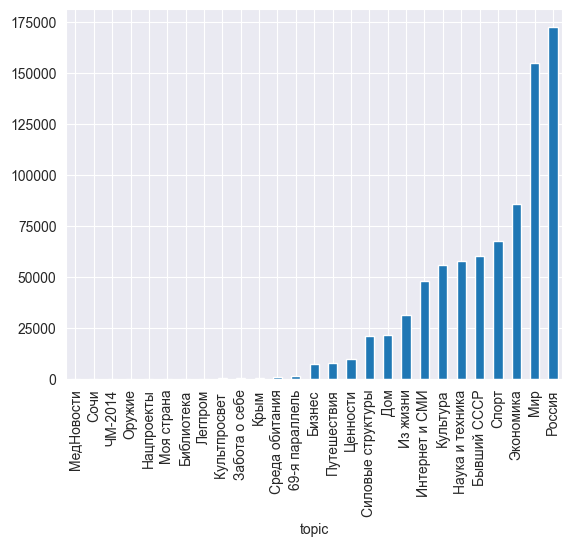

In [21]:
df['topic'].value_counts().sort_values().plot(kind='bar')

#### 4.3 Monthly Publication Volume

<Axes: title={'center': 'Monthly Article Volume'}, xlabel='date'>

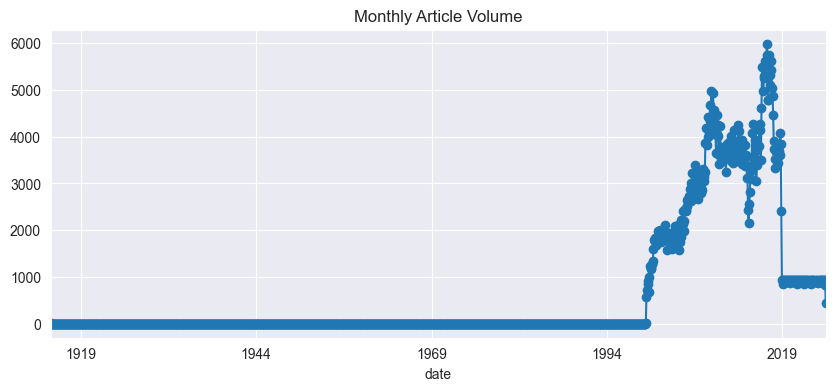

In [22]:
monthly = df.set_index('date').resample('M').size()
monthly.plot(marker='o', figsize=(10, 4), title='Monthly Article Volume')

#### 4.4 Token Length Distributions

In [23]:
df['title_len'] = df['title_clean'].str.split().apply(len)
df['text_len'] = df['text_clean'].str.split().apply(len)

Text(0.5, 1.0, 'Title Length (tokens)')

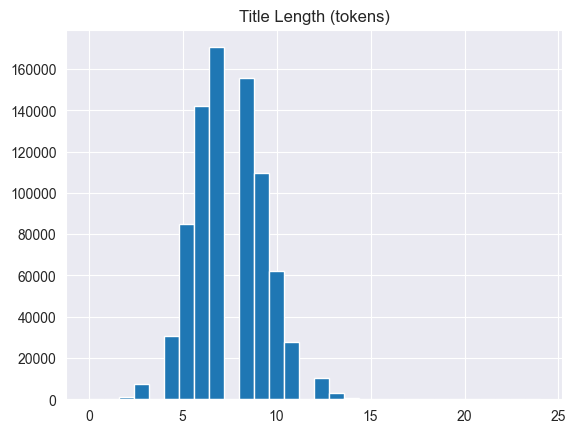

In [24]:
from matplotlib import pyplot as plt

df['title_len'].hist(bins=30)
plt.title('Title Length (tokens)')

#### Text Length by Topic

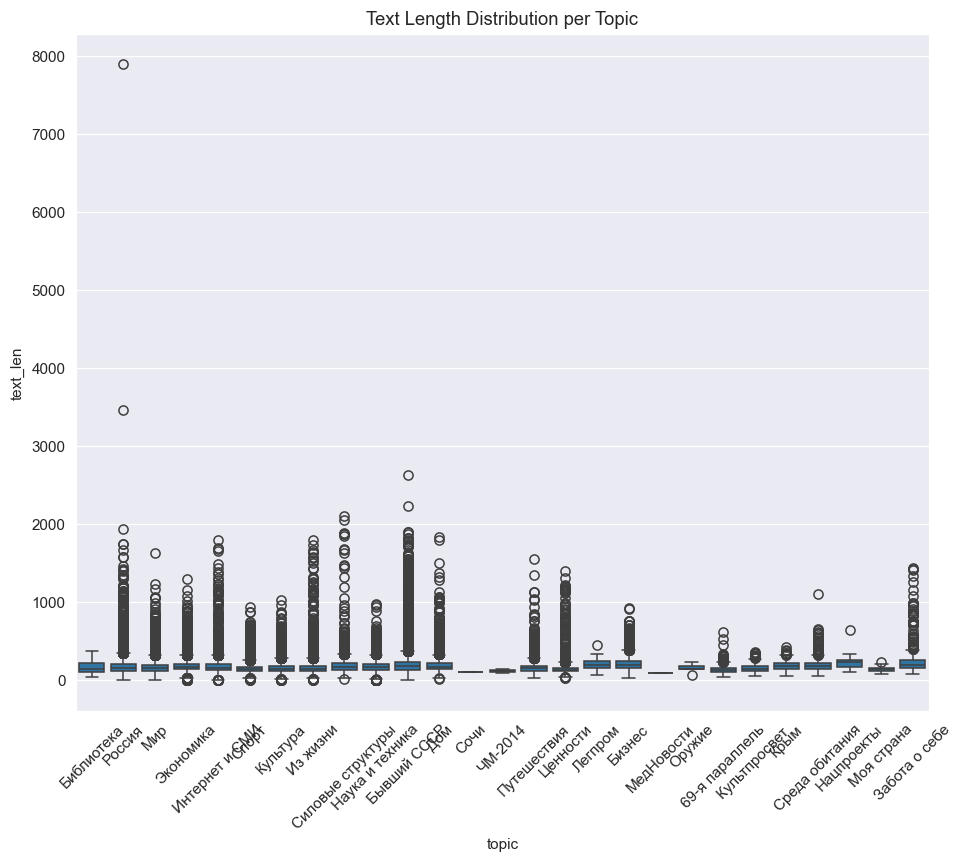

In [25]:
import seaborn as sns
from matplotlib.pyplot import figure

def length_distribution():
    figure(figsize=(10, 8), dpi=110)
    sns.boxplot(x='topic', y='text_len', data=df)
    plt.xticks(rotation=45)
    plt.title('Text Length Distribution per Topic')
    plt.show()
    
length_distribution()

#### Removing Rare Topics

In [26]:
vc = df['topic'].value_counts()
threshold = int(0.005 * df.shape[0])
rare_labels = vc[vc < threshold].index
df = df[~df['topic'].isin(rare_labels)]

In [27]:
df.drop(df[df['text_len'] > 2000].index, inplace=True)

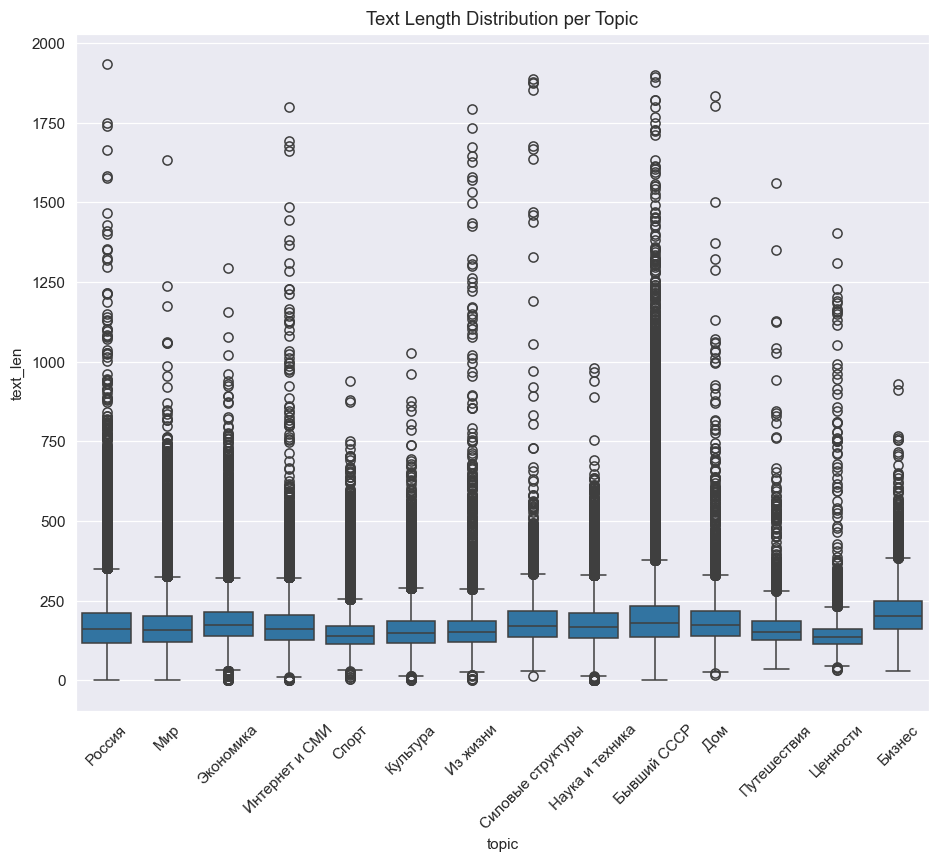

In [28]:
length_distribution()

<Axes: xlabel='topic'>

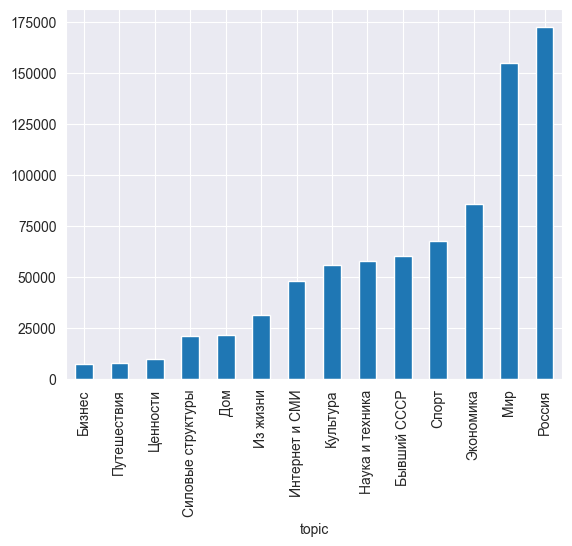

In [29]:
df['topic'].value_counts().sort_values().plot(kind='bar')

#### Lemmatization

In [30]:
# import spacy.cli
# spacy.cli.download("ru_core_news_sm")

In [35]:
import spacy
from tqdm.auto import tqdm

nlp = spacy.load(
    "ru_core_news_sm",
    disable=["parser", "ner", "attribute_ruler", "tok2vec"]
)

texts = df['text_clean'].tolist()
titles = df['title_clean'].tolist()

docs_text = nlp.pipe(texts, batch_size=20000, n_process=8)
docs_title = nlp.pipe(titles, batch_size=20000, n_process=8)

In [32]:
def process(doc):
    return ' '.join([tok.lemma_ for tok in doc if tok.is_alpha and not tok.is_stop])

In [ ]:
df['title_clean'] = [process(doc) for doc in tqdm(docs_title, total=df.shape[0], desc="Titles processing")]

In [ ]:
df['text_clean'] = [process(doc) for doc in tqdm(docs_text, total=df.shape[0], desc="Texts processing")]

#### Dataset Splitting

We chronologically split into:
- **Train**: first 90%  
- **Validation**: next 5%  
- **Test**: final 5%  

This preserves temporal ordering to simulate real-world deployment.

In [44]:
df = df.sort_values('date').reset_index(drop=True)
df = df.drop(columns=['title_len', 'text_len', 'date'])

In [45]:
df = df.drop(df[df.isna().any(axis=1)].index)

In [46]:
train_end = int(df.shape[0] * 0.9)
val_end = int(df.shape[0] * 0.95)

train_df = df[:train_end]
val_df = df[train_end:val_end]
test_df = df[val_end:]

In [47]:
total_classes = df['topic'].unique().shape[0]

for split_name, split_df in [('train', train_df), ('val', val_df), ('test', test_df)]:
    vc = split_df['topic'].value_counts(normalize=True).round(4)
    print(f"\n{split_name.upper()} classes distribution:\n", vc)
    print(f"All classes: {vc.shape[0] == total_classes}")


TRAIN classes distribution:
 topic
Россия               0.2201
Мир                  0.1869
Экономика            0.1083
Спорт                0.0868
Культура             0.0734
Бывший СССР          0.0727
Наука и техника      0.0720
Интернет и СМИ       0.0602
Из жизни             0.0365
Дом                  0.0293
Силовые структуры    0.0257
Бизнес               0.0104
Ценности             0.0097
Путешествия          0.0080
Name: proportion, dtype: float64
All classes: True

VAL classes distribution:
 topic
Россия               0.1740
Мир                  0.1704
Экономика            0.1027
Спорт                0.0848
Наука и техника      0.0780
Из жизни             0.0701
Бывший СССР          0.0659
Интернет и СМИ       0.0639
Культура             0.0580
Силовые структуры    0.0437
Ценности             0.0355
Путешествия          0.0326
Дом                  0.0202
Бизнес               0.0001
Name: proportion, dtype: float64
All classes: True

TEST classes distribution:
 topic
Мир      

In [48]:
train_df.to_csv(DATA_DIR + '/train.csv', index=False)
val_df.to_csv(DATA_DIR + '/val.csv', index=False)
test_df.to_csv(DATA_DIR + '/test.csv', index=False)